In [1]:
import led_calibration as led_c
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.optimize import nnls

24


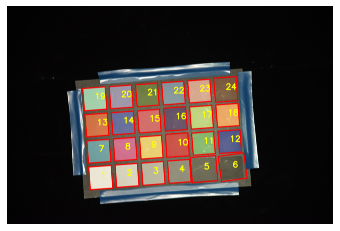

In [2]:
#Get 24 Square Position
img=cv2.imread("extract.JPG")
squares=led_c.ColorCardPosExtract(img,save="extract",show=True)

In [7]:
#Get LED Property
led_path=["data/R","data/G","data/B","data/W"]
A=np.zeros((72,4))
exp_t=[]
count=0
for path in led_path:
    tar=led_c.ReadRaw(path)
    tar_res=led_c.ImgGetColorSquare(tar['processed'],squares)/tar['exposure_time']
    exp_t.append(tar['exposure_time'])
    print(tar['exposure_time'])
    A[:,count:count+1]=np.reshape(tar_res,(-1,1))
    count+=1

print(A.shape)

0.2
0.06666666666666667
0.16666666666666666
0.07692307692307693
(72, 4)


In [4]:
#Target Data
img=led_c.ReadRaw("data/tar")
tar_pos=np.load("data/tar.npy")
for i in tar_pos:
    i[2]=150
np.save("data/tar.npy",tar_pos)
tar_res=led_c.ImgGetColorSquare(img['processed'],tar_pos)
b=np.reshape(tar_res,(-1,1))
b=b[:,0]


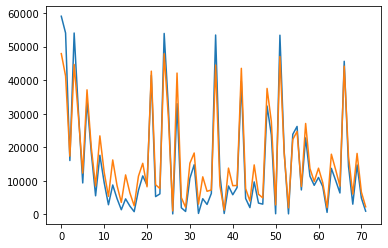

(array([0.11360271, 0.04704107, 0.        , 0.03754383]), 35852.740646606835)


In [12]:
#nnls
res=nnls(A,b)

plt.plot(b)
plt.plot(A.dot(res[0]))
plt.show()
print(res)
